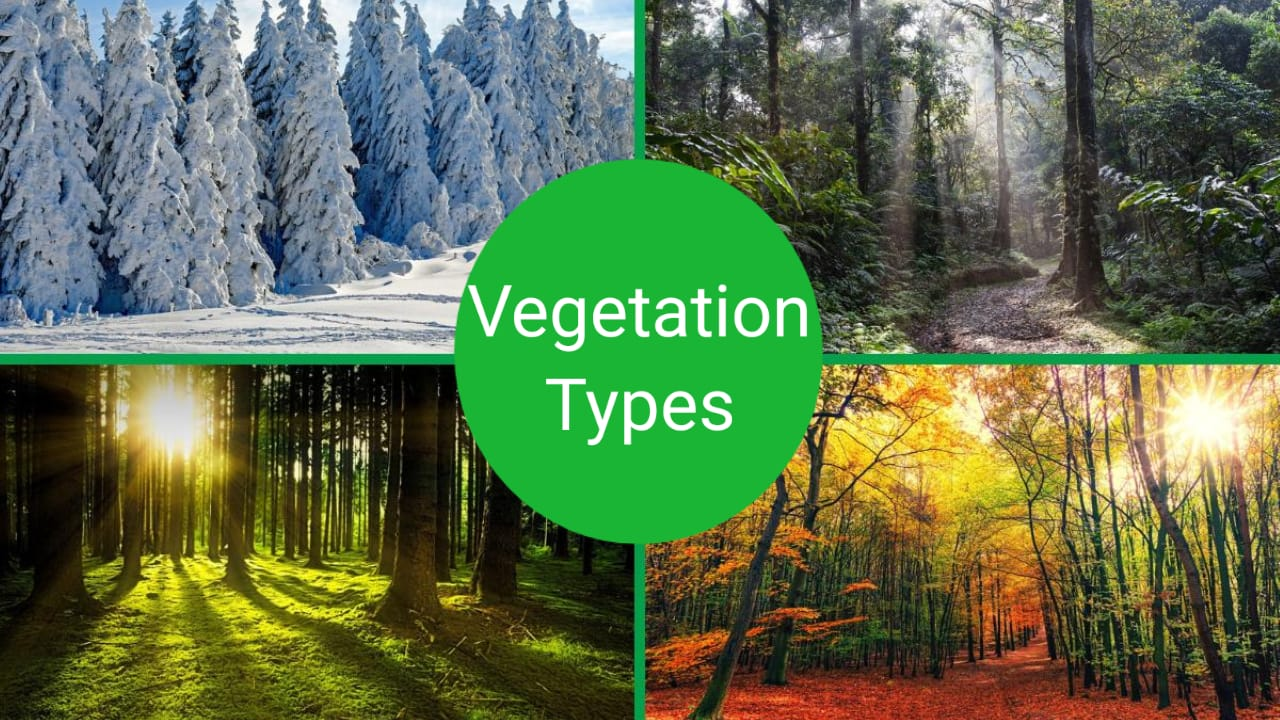

# **Problem Statement.**

Develop a machine learning model to classify forest cover types using 54 input features including elevation, aspect, slope, hydrology distances, hillshade values, wilderness area (one-hot), and soil types (one-hot). The objective is to accurately predict one of seven vegetation types, enabling land-use analysis and ecological decision-making.

# **Importing the Dependencies**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("/content/train.csv")

In [ ]:
df.head()

,Id,Elevation,Aspect,Slope,Horizontal_Distance_To_Hydrology,Vertical_Distance_To_Hydrology,Horizontal_Distance_To_Roadways,Hillshade_9am,Hillshade_Noon,Hillshade_3pm,...,Soil_Type32,Soil_Type33,Soil_Type34,Soil_Type35,Soil_Type36,Soil_Type37,Soil_Type38,Soil_Type39,Soil_Type40,Cover_Type
0,1,2596,51,3,258,0,510,221,232,148,...,0,0,0,0,0,0,0,0,0,5
1,2,2590,56,2,212,-6,390,220,235,151,...,0,0,0,0,0,0,0,0,0,5
2,3,2804,139,9,268,65,3180,234,238,135,...,0,0,0,0,0,0,0,0,0,2
3,4,2785,155,18,242,118,3090,238,238,122,...,0,0,0,0,0,0,0,0,0,2
4,5,2595,45,2,153,-1,391,220,234,150,...,0,0,0,0,0,0,0,0,0,5


# ***Attribute Description***

Basic Attributes

**1. Id** – A unique number to identify each data record.

**2. Elevation bold text** – Height of the land above sea level (in meters).

**3. Aspect** – The direction the slope faces (0–360 degrees).

**4. Slope** – Steepness of the land surface.

**5. Horizontal_Distance_To_Hydrology** – Distance to the nearest water source (river/lake) horizontally.

**6. Vertical_Distance_To_Hydrology** – Height difference between the point and the nearest water source.

**7. Horizontal_Distance_To_Roadways** – Distance to the nearest road.

**8. Hillshade_9am** – Amount of sunlight at 9 AM (0–255 scale).

**9. Hillshade_Noon** – Amount of sunlight at 12 PM.

**10. Hillshade_3pm** – Amount of sunlight at 3 PM.

**11. Horizontal_Distance_To_Fire_Points** – Distance to the nearest fire ignition point.

**12–15. Wilderness_Area1 to Wilderness_Area4** – Show which wilderness area the point belongs to (1 = yes, 0 = no).

**16–55. Soil_Type1 to Soil_Type40** – Indicate the soil type of the location (each column is 1 = present or 0 = not present).

**56. Cover_Type** – The type of forest vegetation (like Spruce/Fir, Aspen, etc.) that grows in that area.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15120 entries, 0 to 15119
Data columns (total 56 columns):
 #   Column                              Non-Null Count  Dtype
---  ------                              --------------  -----
 0   Id                                  15120 non-null  int64
 1   Elevation                           15120 non-null  int64
 2   Aspect                              15120 non-null  int64
 3   Slope                               15120 non-null  int64
 4   Horizontal_Distance_To_Hydrology    15120 non-null  int64
 5   Vertical_Distance_To_Hydrology      15120 non-null  int64
 6   Horizontal_Distance_To_Roadways     15120 non-null  int64
 7   Hillshade_9am                       15120 non-null  int64
 8   Hillshade_Noon                      15120 non-null  int64
 9   Hillshade_3pm                       15120 non-null  int64
 10  Horizontal_Distance_To_Fire_Points  15120 non-null  int64
 11  Wilderness_Area1                    15120 non-null  int64
 12  Wild

# ***Preprocessing***

In [ ]:
df.isnull().sum()

,0
Id,0
Elevation,0
Aspect,0
Slope,0
Horizontal_Distance_To_Hydrology,0
Vertical_Distance_To_Hydrology,0
Horizontal_Distance_To_Roadways,0
Hillshade_9am,0
Hillshade_Noon,0
Hillshade_3pm,0


In [ ]:
df['Cover_Type'].value_counts()

,count
Cover_Type,
5,2160
2,2160
1,2160
7,2160
3,2160
6,2160
4,2160


In [ ]:
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
15115,False
15116,False
15117,False
15118,False


In [ ]:
df.corr(numeric_only=True)['Cover_Type']

,Cover_Type
Id,0.108363
Elevation,0.016090
Aspect,0.008015
Slope,0.087722
Horizontal_Distance_To_Hydrology,-0.010515
Vertical_Distance_To_Hydrology,0.075647
Horizontal_Distance_To_Roadways,-0.105662
Hillshade_9am,-0.010286
Hillshade_Noon,-0.098905
Hillshade_3pm,-0.053399


In [ ]:
df.drop(['Id','Soil_Type7','Soil_Type15','Soil_Type30','Soil_Type34'],axis=1,inplace=True)

# Correlation of Cover_type with other attributes

/tmp/ipython-input-1979606324.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')


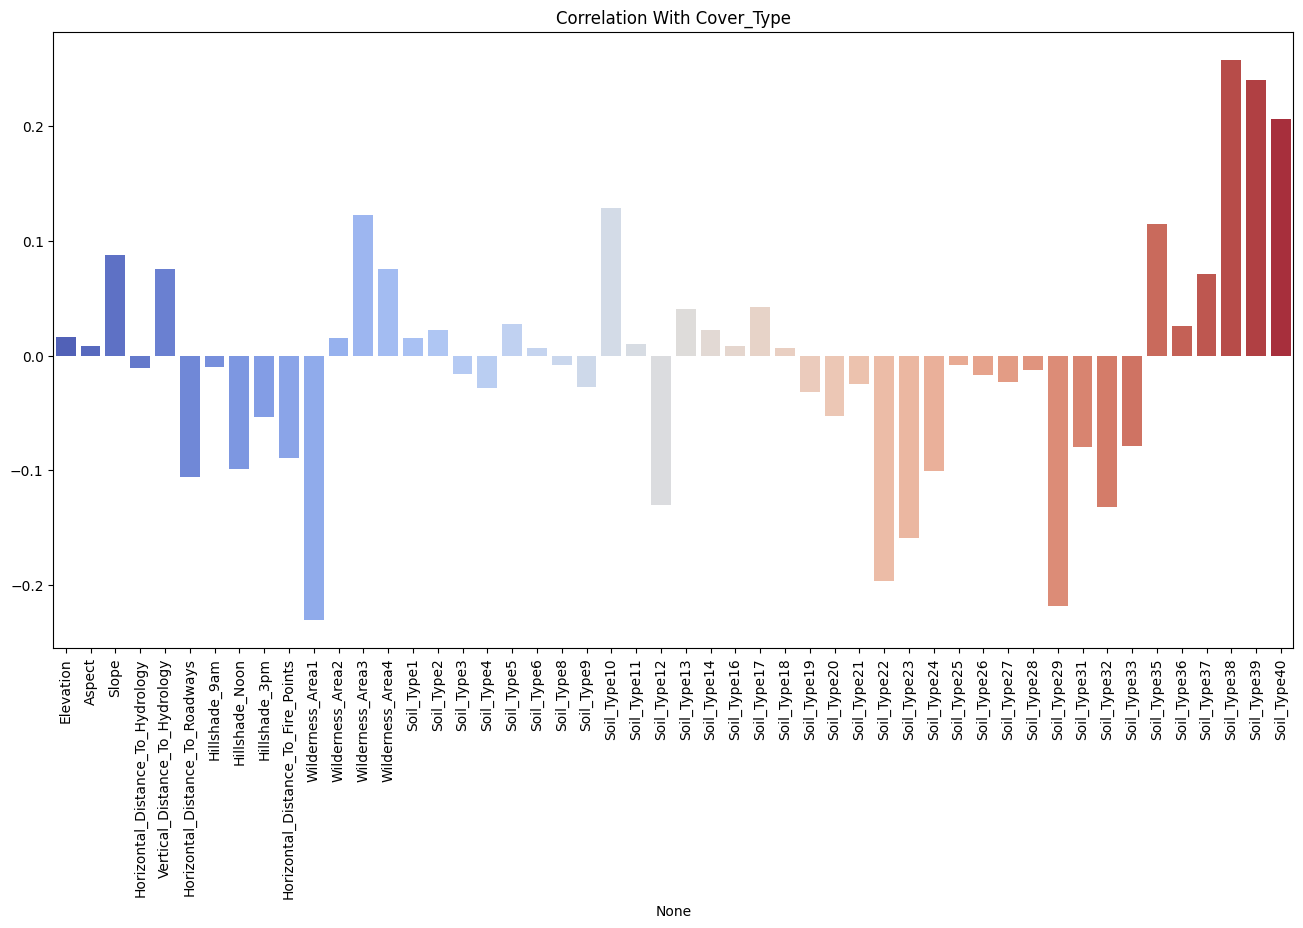

In [ ]:
correlation=df.corr(numeric_only=True)['Cover_Type'].drop('Cover_Type')
plt.figure(figsize=(16,8))
sns.barplot(x=correlation.index, y=correlation.values, palette='coolwarm')
plt.xticks(rotation=90)
plt.title("Correlation With Cover_Type")
plt.show()

In [ ]:
x=df.drop('Cover_Type',axis=1)
y=df['Cover_Type']

# Model Implementation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [ ]:
x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.2, random_state=42)

In [ ]:
models = {
    'Decision Tree' : DecisionTreeClassifier(),
    'Random Forest' : RandomForestClassifier(),
    'Gradient Boost' : GradientBoostingClassifier(),
    'Extra Trees' : ExtraTreesClassifier(),
    'SVM' : SVC()
}
results = {}

In [ ]:
for name, model in models.items():
  print(f'{name} :')
  model.fit(x_train,y_train)
  y_pred = model.predict(x_test)

  print("accuracy :",accuracy_score(y_test,y_pred))
  print()
  results[name] = {
        'accuracy' :accuracy_score(y_test,y_pred)
  }


Decision Tree :
accuracy : 0.7883597883597884

Random Forest :
accuracy : 0.8693783068783069

Gradient Boost :
accuracy : 0.8072089947089947

Extra Trees :
accuracy : 0.8680555555555556

SVM :
accuracy : 0.6259920634920635



In [ ]:
y_pred = models['Extra Trees'].predict(x_test)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.78      0.77      0.77       421
           2       0.81      0.70      0.75       438
           3       0.85      0.85      0.85       428
           4       0.92      0.98      0.95       449
           5       0.89      0.95      0.92       416
           6       0.87      0.87      0.87       432
           7       0.95      0.96      0.96       440

    accuracy                           0.87      3024
   macro avg       0.87      0.87      0.87      3024
weighted avg       0.87      0.87      0.87      3024



In [ ]:
df.iloc[10].values

array([2612,  201,    4,  180,   51,  735,  218,  243,  161, 6222,    1,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    1,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    5])

In [ ]:
import pickle
pickle.dump(models['Extra Trees'],open('Extra Trees.pkl','wb'))

In [ ]:
from google.colab import files
files.download('Extra Trees.pkl')